In [164]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [165]:
# Load Training data
df = pd.read_csv("vowel.train",index_col = 0)
# Load Test data
df_test = pd.read_csv("vowel.test",index_col = 0)

In [187]:
# Splits Training data and training labels 
X_train = df.values[:,1:]
y_train = df.values[:,0]
#display(pd.DataFrame(X_train).head(10))
#display(pd.DataFrame(y_train).head(10))
# Splits Test data and test labels 
X_test = df_test.values[:,1:]
y_test = df_test.values[:,0]
#display(pd.DataFrame(X_test).head(10))
#display(pd.DataFrame(y_test).head(10))

print(X_train[:2,:])

[[-3.639  0.418 -0.67   1.779 -0.168  1.627 -0.388  0.529 -0.874 -0.814]
 [-3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.51  -0.621 -0.488]]


In [167]:
clf = QuadraticDiscriminantAnalysis(store_covariances=True)
clf.fit(X_train,y_train)

/Users/harvey/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=True, tol=0.0001)

In [168]:
clf.score(X_test,y_test)
#clf.get_params()

0.47186147186147187

In [169]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
drA = lda.transform(X_train)
df["PC1"] = drA[:,0]
df["PC2"] = drA[:,1]
df["class"] = y_train

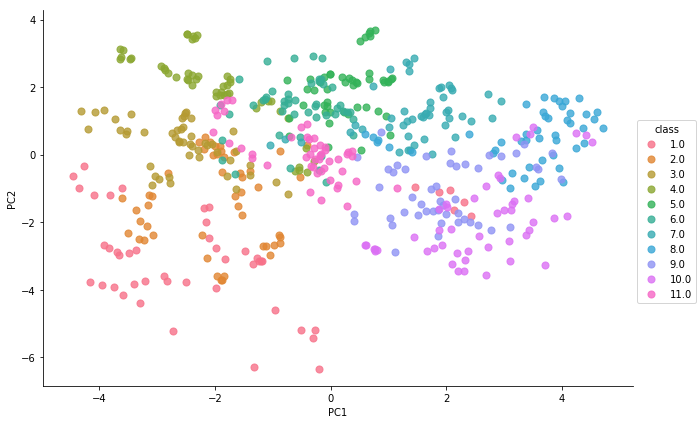

In [170]:
vis = sns.lmplot(data = df[["PC1","PC2","class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )

In [171]:
# QDA from scratch 
# suppress scientific print
np.set_printoptions(suppress=True)
# Load Training data
df = pd.read_csv("vowel.train",index_col = 0)
df.head(20)
print(df.shape)
data = df.values
#print(data[data[:,0]==1])

(528, 11)


           x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
x.1   1.000000 -0.514716 -0.431104  0.018702 -0.169014  0.241951 -0.050335   
x.2  -0.514716  1.000000  0.072350 -0.429050 -0.351336 -0.440756  0.230719   
x.3  -0.431104  0.072350  1.000000  0.136356 -0.011593 -0.535098 -0.282820   
x.4   0.018702 -0.429050  0.136356  1.000000 -0.079888  0.121749 -0.557746   
x.5  -0.169014 -0.351336 -0.011593 -0.079888  1.000000  0.115584  0.007378   
x.6   0.241951 -0.440756 -0.535098  0.121749  0.115584  1.000000  0.034545   
x.7  -0.050335  0.230719 -0.282820 -0.557746  0.007378  0.034545  1.000000   
x.8   0.200404  0.154069 -0.129102 -0.055777 -0.480676  0.227397 -0.064591   
x.9   0.018457  0.087534  0.178232  0.275087 -0.536317 -0.146272 -0.225494   
x.10 -0.094992 -0.129298  0.309608  0.201471  0.052664 -0.300694 -0.307216   

           x.8       x.9      x.10  
x.1   0.200404  0.018457 -0.094992  
x.2   0.154069  0.087534 -0.129298  
x.3  -0.129102  0.178232  0.30

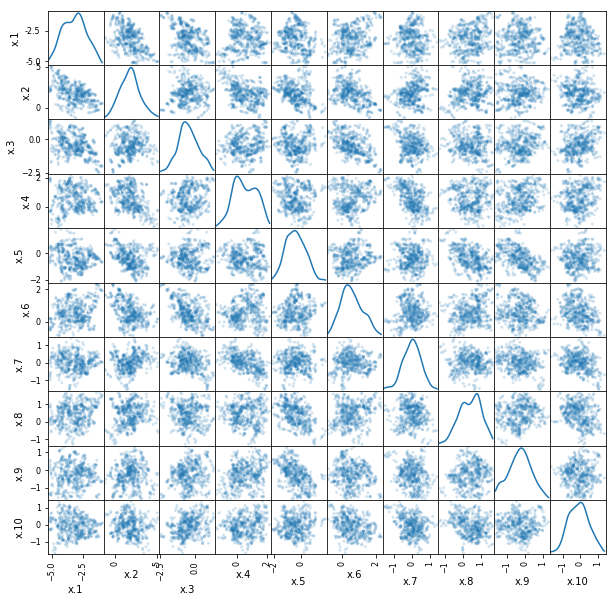

In [174]:
#Visualizing data through scatter matrix 

scatter_matrix(df.iloc[:,1:], alpha=0.2, figsize=(10, 10), diagonal='kde')
# Correlation between columns (variables)
print(df.iloc[:,1:].corr())

# Estimating for prior 
class1 = data[data[:,0] == 1]
priors = []
for i in range (1,12):
    # all examples with class i
    class_i = data[data[:,0]==i]
    num_class_i = class_i.shape[0]
    priors.append(num_class_i/data.shape[0])
print("class priors")
print(priors)
#Observations : all class have equal priors

#Estimating mean vector for each class

mu = []
for i in range(1,12):
    #all examples with class i , 
    #caution , excluding the first column(the class label) when computing
    class_i = data[data[:,0]==i][:,1:]
    mu_i = np.sum(class_i,axis = 0)/class_i.shape[0]
    mu.append(mu_i)
print("mean vector for class 1")
print(mu[0])
#print(np.mean(data[data[:,0]==1][:,1:],axis = 0))
#Estimating the covariance for each class 

cov = []
for i in range(1,12):
    class_i = data[data[:,0]==i][:,1:]
    #normalize by N-1 since we are applying sample covariance
    cov_i = (class_i - mu[i-1]).T.dot((class_i - mu[i-1]))/(class_i.shape[0]-1)
    cov.append(cov_i)
    
#print(data[data[:,0]==i][:,1:]-mu[0])
print("covariance matrix for class 1")
print(cov[0])

#Make predictions by using discriminant function

def predict(x,mu,cov,priors):
    '''
    parameters :
    x : the test point, given by shape (1,10) , 10 total features
    mu: the mean matrix, where each row is the mean vector for one class
    cov: matrix of covariance matrix , each one is covariance matrix for one class
    priors : prior probabilities for each class 
    '''
    dis = []
    for i in range(11):
        dis_k = (-1/2)*np.log(np.linalg.det(cov[i])) - (1/2)*(x - mu[i]).T.dot(np.linalg.inv(cov[i])).dot(x-mu[i]) \
        + np.log(priors[i])
        dis.append(dis_k)
    prediction = np.argmax(dis) + 1
    return prediction

print(predict(data[1,:][1:],mu,cov,priors))








In [160]:
#Load Test data 
pred_test = []
for i in X_test:
    prediction = predict(i,mu,cov,priors)
    pred_test.append(prediction)

def cal_accuracy(pred_text,true_test):
    count = 0
    n = len(pred_test)
    for i in range(n):
        if (pred_test[i] == true_test[i]) :
            count = count + 1
    return count/n
            
            
print("accuracy for QDA")
#print(y_test)
print(cal_accuracy(pred_test,y_test))

accuracy for QDA
0.47186147186147187


In [225]:
# Linear Discriminant for basis expansion
# Test
a = np.array([[1,2,3,4,5,6,7,8,9,10],[4,5,6,7,8,9,10,11,12,13]])
print(a)
mu_a = np.mean(a,axis = 0)
print(mu_a)
print(a - mu_a)

expansion = []
for i in range(10):
    for j in range(i,10):
        interaction_term = np.multiply(a[:,i],a[:,j])
        expansion.append(interaction_term)
#print(np.array(expansion).T.shape)
#print(np.hstack((a,np.array(expansion).T)))


# Basis expansion 
# for all 10 features
def expansion(X):
    extended_feature = []
    for i in range(X.shape[1]):
        for j in range(i,X.shape[1]):
            interaction_term = np.multiply(X[:,i],X[:,j])
            extended_feature.append(interaction_term)
    extended_feature = np.array(extended_feature).T
    return extended_feature
print(expansion(X_train).shape)
X_train_aug = np.hstack((X_train,expansion(X_train)))
print(X_train_aug.shape)
X_test_aug = np.hstack((X_test,expansion(X_test)))


    
    

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 4  5  6  7  8  9 10 11 12 13]]
[ 2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5]
[[-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]]
(528, 55)
(528, 65)


In [246]:
#reconstruct data matrix with augmented feature
y_train = y_train.reshape(-1,1)
data = np.hstack((y_train,X_train_aug))
print(data.shape)


# Estimating for prior 
priors = []
for i in range (1,12):
    # all examples with class i
    class_i = data[data[:,0]==i]
    num_class_i = class_i.shape[0]
    priors.append(num_class_i/data.shape[0])
print("class priors")
print(priors)
#Observations : all class have equal priors

#Estimating mean vector for each class

mu = []
for i in range(1,12):
    #all examples with class i , 
    #caution , excluding the first column(the class label) when computing
    class_i = data[data[:,0]==i][:,1:]
    mu_i = np.sum(class_i,axis = 0)/class_i.shape[0]
    mu.append(mu_i)
print("mean vector for class 1")
print(mu[0])

#print(np.mean(data[data[:,0]==1][:,1:],axis = 0))

#Estimating the common covariance 

cov = np.array([0.0]*(data.shape[1]-1)*(data.shape[1]-1)).reshape((data.shape[1]-1),(data.shape[1]-1))

for i in range(1,12):
    class_i = data[data[:,0]==i][:,1:]
    #normalize by N-1 since we are applying sample covariance
    cov += (class_i - mu[i-1]).T.dot((class_i - mu[i-1]))
cov = cov/(data.shape[0]-(data.shape[1]-1))
print(cov.shape)
def lda_predict(x,mu,cov,priors):
    #Total of 11 classes
    dis = []
    for i in range (11):
        dis_k = x.T.dot(np.linalg.inv(cov)).dot(mu[i]) - (1/2)*mu[i].T.dot(np.linalg.inv(cov)).dot(mu[i]) + np.log(priors[i])
        #print(i)
        #print(dis_k)
        dis.append(dis_k)
    prediction = np.argmax(dis) + 1
    return prediction

test_pt = X_test_aug[0,:]
#print(test_pt)
#print(len(mu))
#print(cov.shape)
#print(len(priors))
print(lda_predict(test_pt,mu,cov,priors))

#Load Test data 
pred_test = []
for i in X_test_aug:
    prediction = lda_predict(i,mu,cov,priors)
    #print(prediction)
    pred_test.append(prediction)
print("accuracy for LDA with basis expansion")
#print(y_test)
print(cal_accuracy(pred_test,y_test))   



(528, 66)
class priors
[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]
mean vector for class 1
[-3.3595625   0.0629375  -0.2940625   1.20333333  0.38747917  1.22189583
  0.096375    0.03710417 -0.62435417 -0.161625   12.71805069 -0.8938654
 -0.34388369 -4.40551104 -1.48176546 -3.37291215 -0.00472167  0.43989579
  1.86378165  0.26364094  0.77667073  0.49833504  0.30571925 -0.24339158
 -0.44082019 -0.20327669  0.02615775  0.16542108  0.03830152  1.48352719
 -0.05801408  0.10544827 -1.0545085  -0.35628233 -0.60421831  0.42422933
  0.4210954   1.66676083  0.39798277  1.30081406 -0.09063933 -0.05614744
 -0.68238673 -0.11758319  0.64416827  0.46585079  0.16160571 -0.4019906
 -0.31080702  0.07987508  2.06749365  0.27690252  0.31171325 -0.98096294
 -0.41535069  0.31206258  0.03493873 -0.23204029 -0.14192846  0.66

In [248]:
lda = LinearDiscriminantAnalysis(n_components=2)
y_train = df.values[:,0]
lda.fit(X_train_aug, y_train)
drA = lda.transform(X_train_aug)
df["PC1"] = drA[:,0]
df["PC2"] = drA[:,1]
df["class"] = y_train

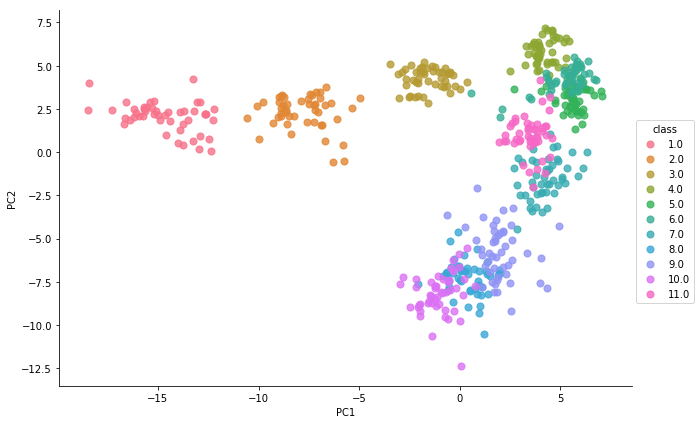

In [249]:
vis = sns.lmplot(data = df[["PC1","PC2","class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )